In [68]:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy.stats import lognorm


cats = {
    "EDIP-Gold": "Gold [kg]",
    "EDIP-Copper": "Copper [kg]",
    "ADP-Minerals- Total": "Depletion of Minerals [kg Sb-eq]",
    "EI-Minerals- Total": "Economic Importance [kg Sb-eq]",
    "EI-Minerals-Precious Metals": "Precious Metals",
    "GPR-Minerals- Total": "Geo-Politic Supply Risk [1]",
    "CML-climate change (GWP 100a)": "Green House Emissions",
    "CED - total": "Primary Energy [MJ-eq]",
    "EcoIndicator 99 (E - E) - total":"Total Impacts",
    "ReCiPe Endpoint (E - A) - total (total)": "Total Impacts",
}


sns.set_theme()
sns.set(context="paper", style="whitegrid", font="Times New Roman")
cm = 1/2.54
FONTSIZE = 8

def get_label(shape,scale):
    sigma = "\u03C3"
    mu ="\u03BC"
    geomUnc= np.exp(shape)
    scale_val = "{:.2E}".format(scale)
    geomUnc = "{:.4}".format(geomUnc)
    label = f"{mu} = {scale_val}, " + f"{sigma} = {geomUnc}"
    return label

In [69]:
ps_name="3208-Mainboard"
if True:
    base= "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Base", ps_name)
    corr = "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Corr", ps_name)
    df_mc_base=pd.read_csv(base)
    df_mc_corr=pd.read_csv(corr)
    fig, axs = plt.subplots(2,1,figsize=(8,8))
    for col in ["CED - total"]:
        data_base = df_mc_base[col]
        data_corr = df_mc_corr[col]
        data_base= [x for x in data_base if x>0]
        data_corr = [x for x in data_corr if x>0]        
        shape, loc, scale = stats.lognorm.fit(data_base, floc=0)
        shape2, loc2, scale2 = stats.lognorm.fit(data_corr, floc=0)
        shapes = [shape, shape2]
        scales = [scale, scale2] 
    
        data_base= [x for x in data_base if x>0 and x<scale*np.exp(shape)**3]
        data_corr = [x for x in data_corr if x>0 and x<scale2*np.exp(shape2)**3]

        max_val = max(max(data_base),max(data_corr))
        print(max_val)
        min_val = min(min(data_base),min(data_corr))
        label0 = get_label(shape,scale)
        label2 = get_label(shape2,scale2)
        data = [data_base, data_corr]
        labels = [label0, label2]

        for i in [0,1]:
            ax = axs[i]
            ax.hist(data[i], bins=40, density=True, alpha=0.6, color="b")
            ax.set_xlabel('X',fontsize=8)
            ax.set_ylabel('Probability Density',fontsize=8)
            ax.set_title(f'Lognormal Distribution',fontsize=10, fontweight= "bold")
            ax.grid(True)

            # Overlay the probability density function (pdf) of the lognormal distribution
            x = np.linspace(0, max(data[i]), 10000)
            pdf = lognorm.pdf(x, shapes[i], scale=scales[i])
            ax.plot(x, pdf, 'r-', lw=2, label='Lognormal PDF')
            for label in (ax.get_xticklabels() + ax.get_yticklabels()):
                label.set_fontsize(8)
            scale = scales[i]
            sigma = np.exp(shapes[i])
            ax.axvline(x = scale/sigma/sigma, color = 'grey', label = '95th, Upper', linestyle="--")
            ax.axvline(x = scale*sigma*sigma, color = 'grey', label = '95th, Lower', linestyle="--")
            ax.axvline(x = scale/sigma, color = 'green', label = '63th, Upper', linestyle="--")
            ax.axvline(x = scale*sigma, color = 'green', label = '63th, Lower', linestyle="--")
            ax.set_xlim(min_val/1.1,max_val)
            ax.legend(fontsize=8)
            ax.set_title(labels[i],fontweight='bold')
            #ax.title()
            #ax.set_ylim([0, 3])
            #if col =="GPR-Minerals- Total":
        
    fig.suptitle(cats[cats], fontweight= "bold")    #ax.set_yscale("log")
        
        #ax.set_xticklabels([label0,label2])#labels, *, fontdict=None, minor=False, **kwargs)
        


8556.58269660554


TypeError: unhashable type: 'dict'

In [70]:
ps_name = "3208-Mainboard"
cat_list = {"EDIP-Gold": "Gold [kg]",
            "EI-Minerals- Total": "Economic Importance [kg Sb-eq]",
            "GPR-Minerals- Total": "Geo-Politic Supply Risk [1]",
            "CED - total": "Primary Energy [MJ-eq]",
            }
ps_names = [
"3204-CPU, mounted mainboard",
"3208-Mainboard",
"3211-PCB mounted mainboard",
"3219-PCB, for power supply unit",
"4440-Server, 1U, no storage",
"4443-Server, 2U, storage",
"4455-Blade (Ref. Unit)",
"5101-KDO-IT",
"6001-KDO"
]
for ps_name in ps_names:
    corr = "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Corr", ps_name)
    df_mc_corr = pd.read_csv(corr)
    fig, axs = plt.subplots(2, 2, figsize=(22*cm, 20*cm))
    ax_ = [axs[i][j] for i in range(2) for j in range(2)]
    i=0
    for cat in cat_list.keys():
        data_corr = df_mc_corr[cat]
        data_corr = [x for x in data_corr if x > 0]
        for _ in range(2):
            shape, loc, scale = stats.lognorm.fit(data_corr, floc=0)
            data_corr = [x for x in data_corr if x < scale*np.exp(shape)**4]
            data_corr = [x for x in data_corr if x < scale*3]

        shape, loc, scale = stats.lognorm.fit(data_corr, floc=0)
        
        max_val = max(data_corr)
        min_val = min(data_corr)
        label_title = get_label(shape, scale)
        ax = ax_[i]
        ax.hist(data_corr, bins=40, density=True, alpha=0.6, color="b")
        ax.set_xlabel(cat_list[cat], fontsize=8)
        ax.set_ylabel('Probability Density', fontsize=8)
        ax.set_title(label_title,
                     fontsize=FONTSIZE, fontweight="bold")
        ax.grid(True)

        # Overlay the probability density function (pdf) of the lognormal distribution
        x = np.linspace(0, max_val*1.1, 10000)
        pdf = lognorm.pdf(x, shape, scale=scale)
        ax.plot(x, pdf, 'r-', lw=2, label='Lognormal PDF')
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(FONTSIZE*0.75)
        sigma = np.exp(shape)
        ax.axvline(x=scale/sigma/sigma, color='grey',
                   label='95th, Upper', linestyle="--")
        ax.axvline(x=scale*sigma*sigma, color='grey',
                   label='95th, Lower', linestyle="--")
        ax.axvline(x=scale/sigma, color='green',
                   label='63th, Upper', linestyle="--")
        ax.axvline(x=scale*sigma, color='green',
                   label='63th, Lower', linestyle="--")
        ax.set_xlim(min_val/1.1, max_val)
        ax.legend(fontsize=8)

        if i !=2:
            ax_[i].get_legend().remove()
        else:
            ax_[i].legend(bbox_to_anchor=(1.1, -0.25), loc="lower center", ncol=5, fontsize=FONTSIZE)
        
        i+=1
    fig.savefig(f"SimpleResults/{ps_name}.png", dpi=900, bbox_inches='tight')
    plt.close()





In [ ]:
assert(1==2)

AssertionError: 

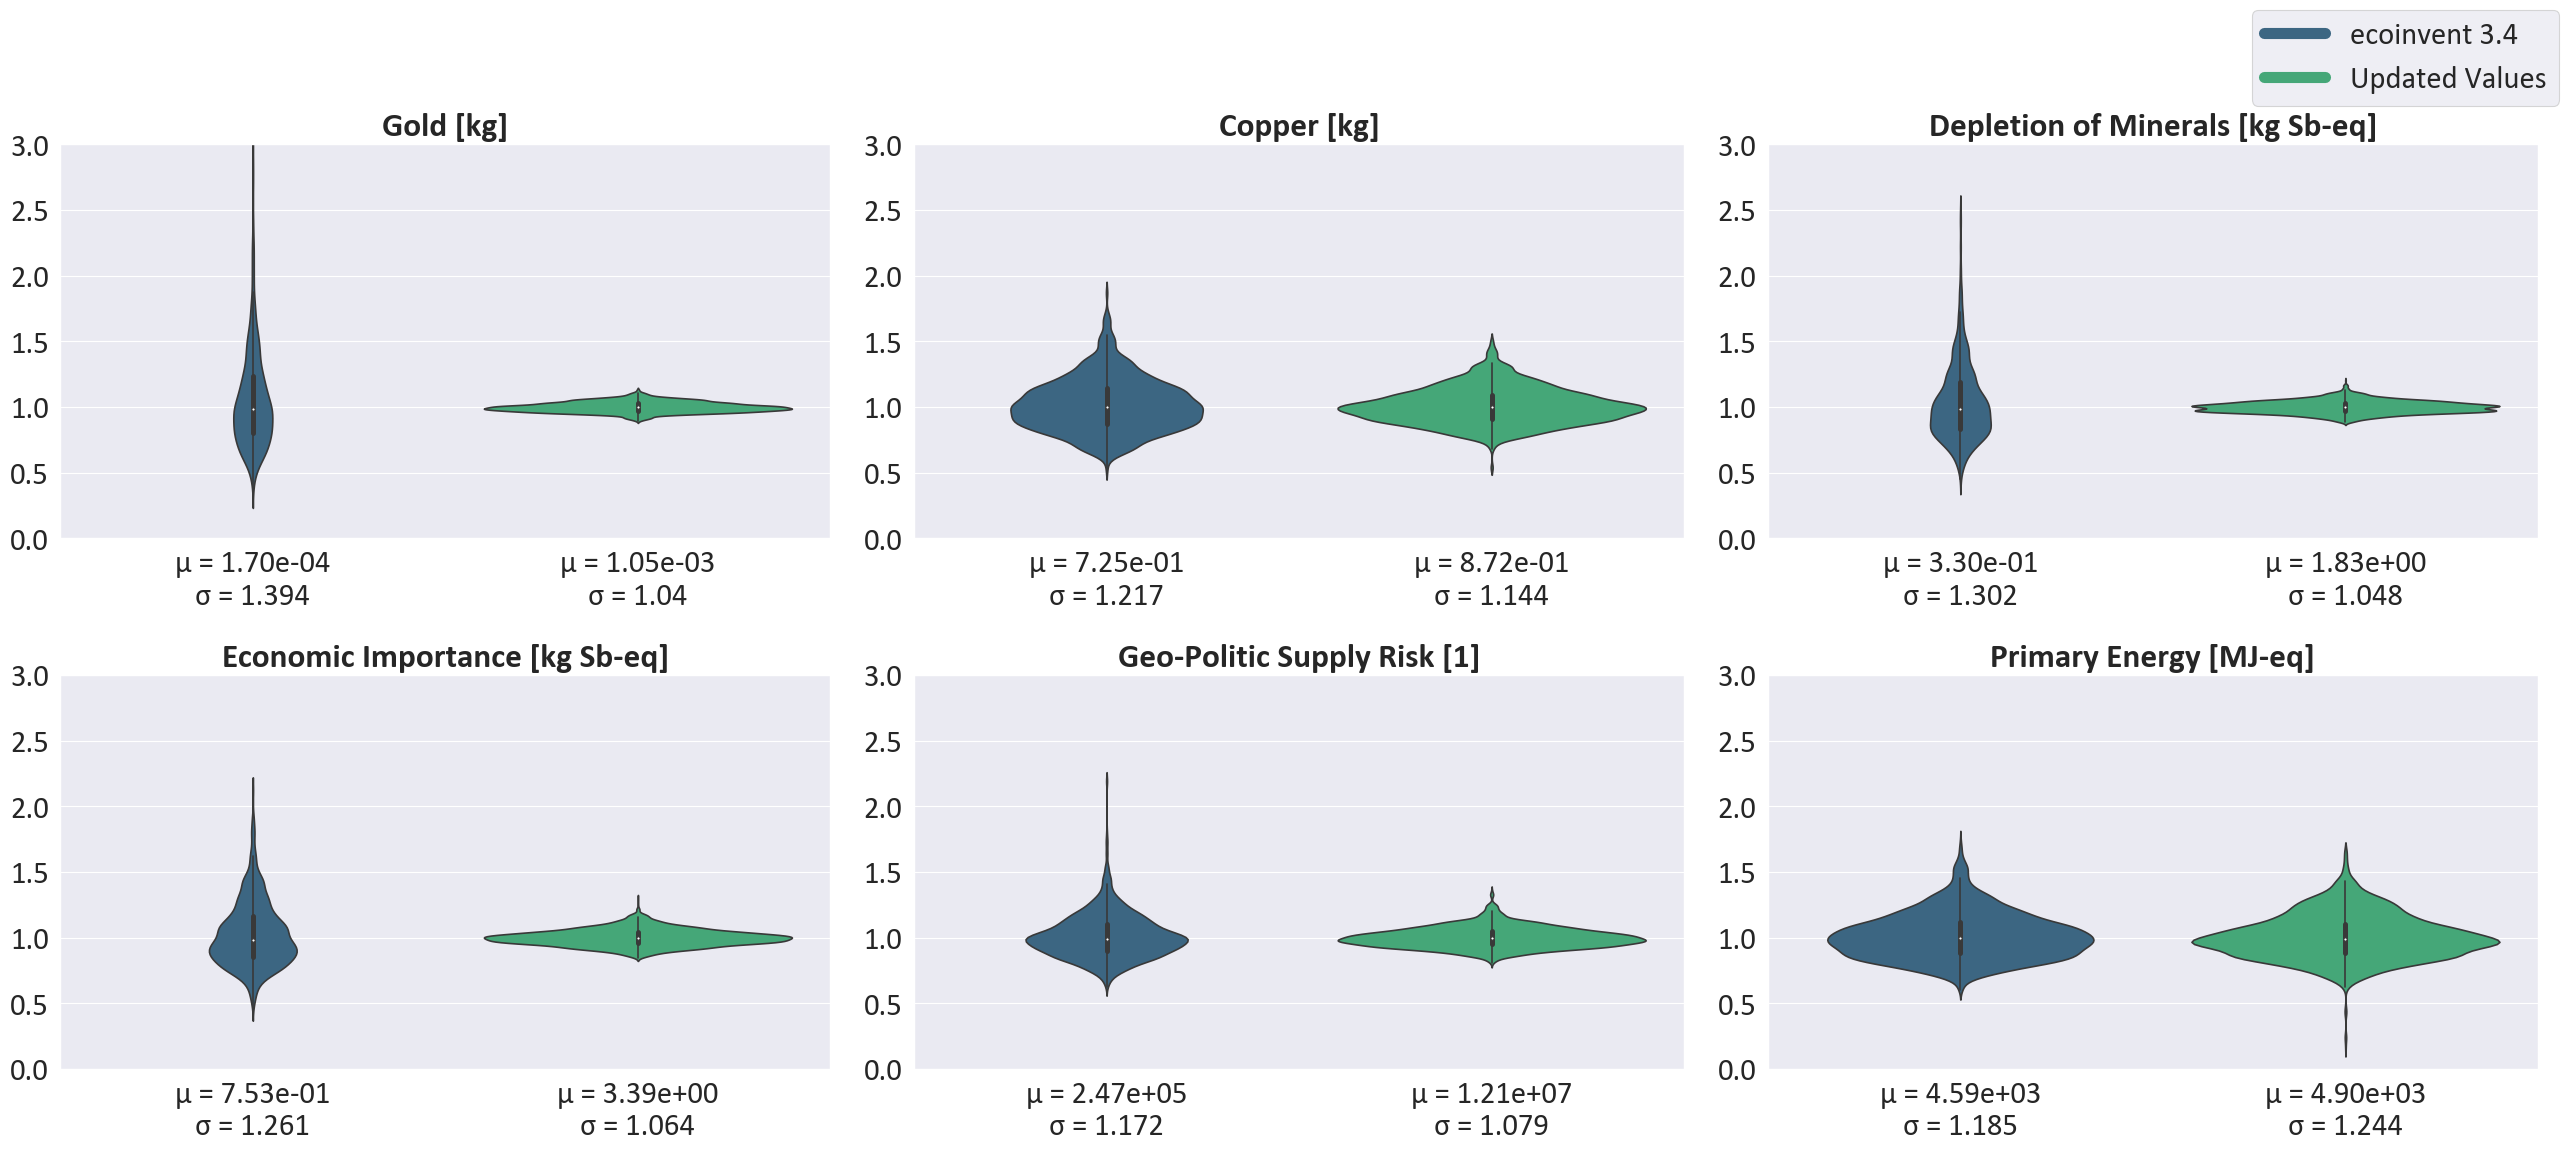

In [ ]:

# "GPR-Minerals- Total" #"ADP-Minerals-Copper" #"ReCiPe Midpoint (E) - metal depletion (MDP)" #"CED - total" #"EDIP-Gold" # "GPR-Minerals- Total"

def analyse_montecarlo(ps_name):
    base= "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Base", ps_name)
    corr = "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Corr", ps_name)
    sns.set(context="paper", palette="colorblind", style="darkgrid", font_scale = 2.5, font="Calibri")

    df_mc=pd.read_csv(base)
    df_mc2=pd.read_csv(corr)
    fig, axes = plt.subplots(2,3,figsize=(26,11))

    i=0
    for col in cols.keys():
        data = df_mc[col]
        data2 = df_mc2[col]
        rows= min(len(data),len(data2))
        data=data[:rows]
        data2=data2[:rows]
        d = {"Base":data, "Corr":data2}
        df = pd.DataFrame(d)
        df=df[df["Base"]>0]
        df=df[df["Corr"]>0]
        shape, loc, scale = stats.lognorm.fit(df["Base"], floc=0)
        shape2, loc2, scale2 = stats.lognorm.fit(df["Corr"], floc=0)

        df=df[df["Base"]<3*scale]
        df=df[df["Corr"]<3*scale2]

        def get_label(shape,scale):
            sigma = "\u03C3"
            mu ="\u03BC"
            geomUnc= np.exp(shape)
            scale_val = "{:.2e}".format(scale)
            geomUnc = "{:.4}".format(geomUnc)
            label = f"{mu} = {scale_val}\n" + f"{sigma} = {geomUnc}"
            return label

        label0 = get_label(shape,scale)
        label2 = get_label(shape2,scale2)
        df_norm= copy.deepcopy(df)
        df_norm["Base"]*=(1/scale)
        df_norm["Corr"]*=(1/scale2)
        #, palette="colorblind",
        ax = axes[int((i-i%3)/3)][i%3]
        sns.violinplot(data=df_norm, ax=ax,orient ='v',palette="viridis")

        ax.set_title(cols[col],fontweight='bold')

        #ax.title()
        ax.set_ylim([0, 3])
        #if col =="GPR-Minerals- Total":
            #ax.set_yscale("log")
        
        ax.set_xticklabels([label0,label2])#labels, *, fontdict=None, minor=False, **kwargs)
        i+=1

    from matplotlib.lines import Line2D
    # https://imagecolorpicker.com/en
    c1= "#3c6682"
    c2 ="#45a778"
    custom_lines = [Line2D([0], [0], color=c1, lw=8, label="ecoinvent 3.4"),
                    Line2D([0], [0], color=c2, lw=8, label="Updated Values"),
                    ]
    
    fig.legend(bbox_to_anchor=(1,1.075),handles=custom_lines)
    fig.tight_layout(h_pad=1, w_pad=1)
    #fig.suptitle("Comparison of Result Uncertainty Values (after laboratory measurements) \n" + ps_name,
    #             fontsize=16,fontweight='bold',y=1.075)

    fig.savefig(f"MonteCarloRes/plot/MC-Analysis{ps_name}.png",bbox_inches='tight')

analyse_montecarlo("3204-CPU, mounted mainboard")


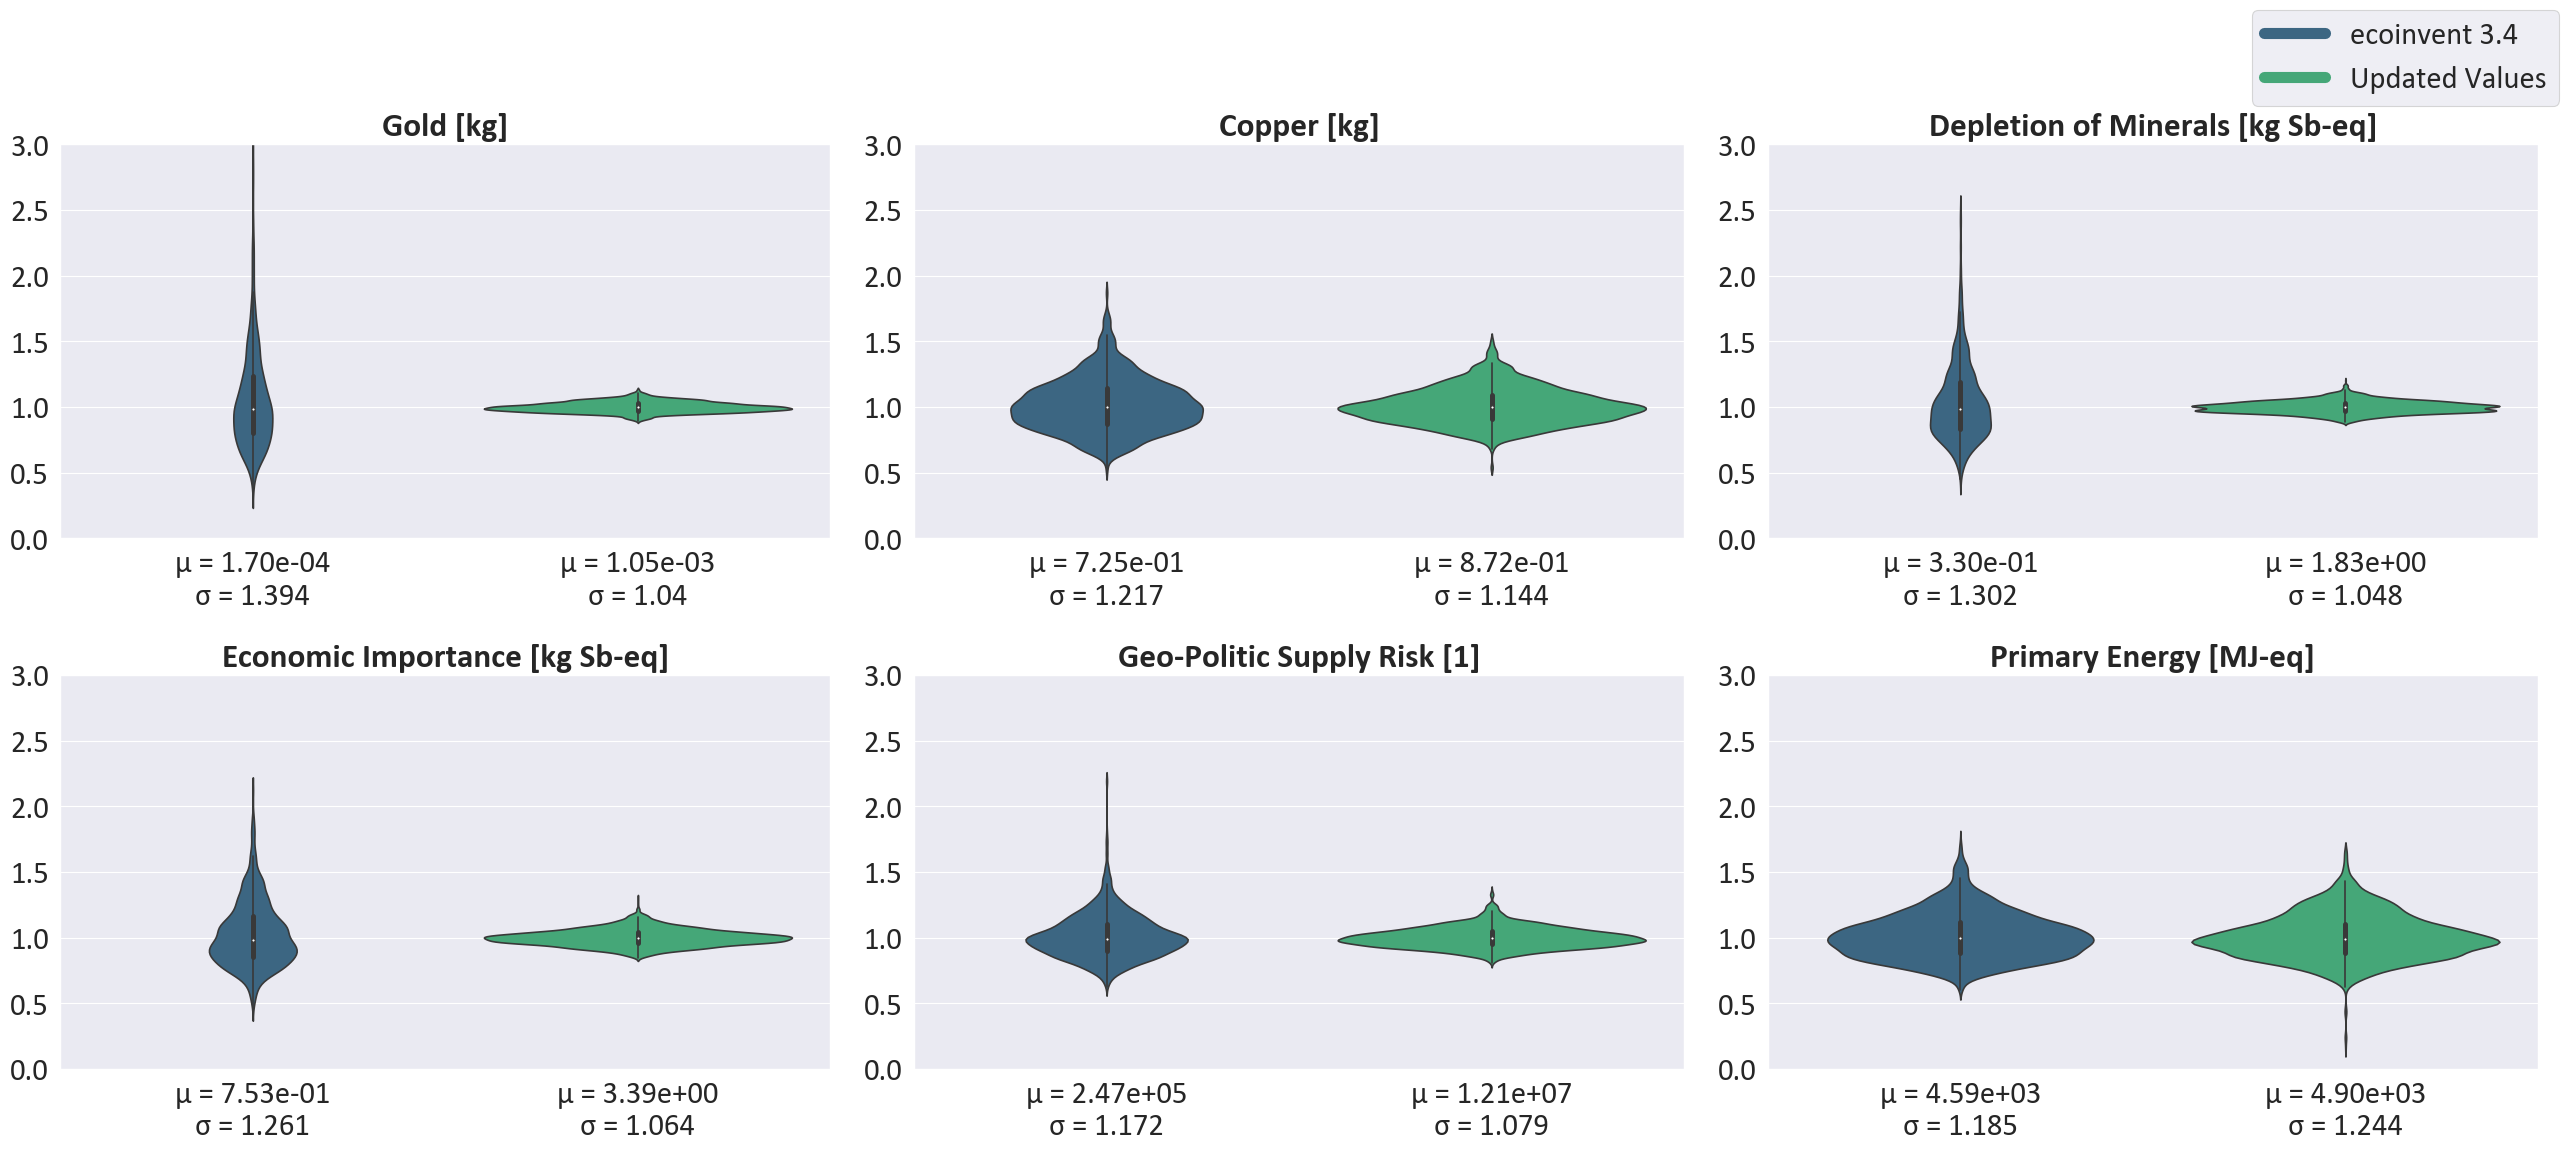

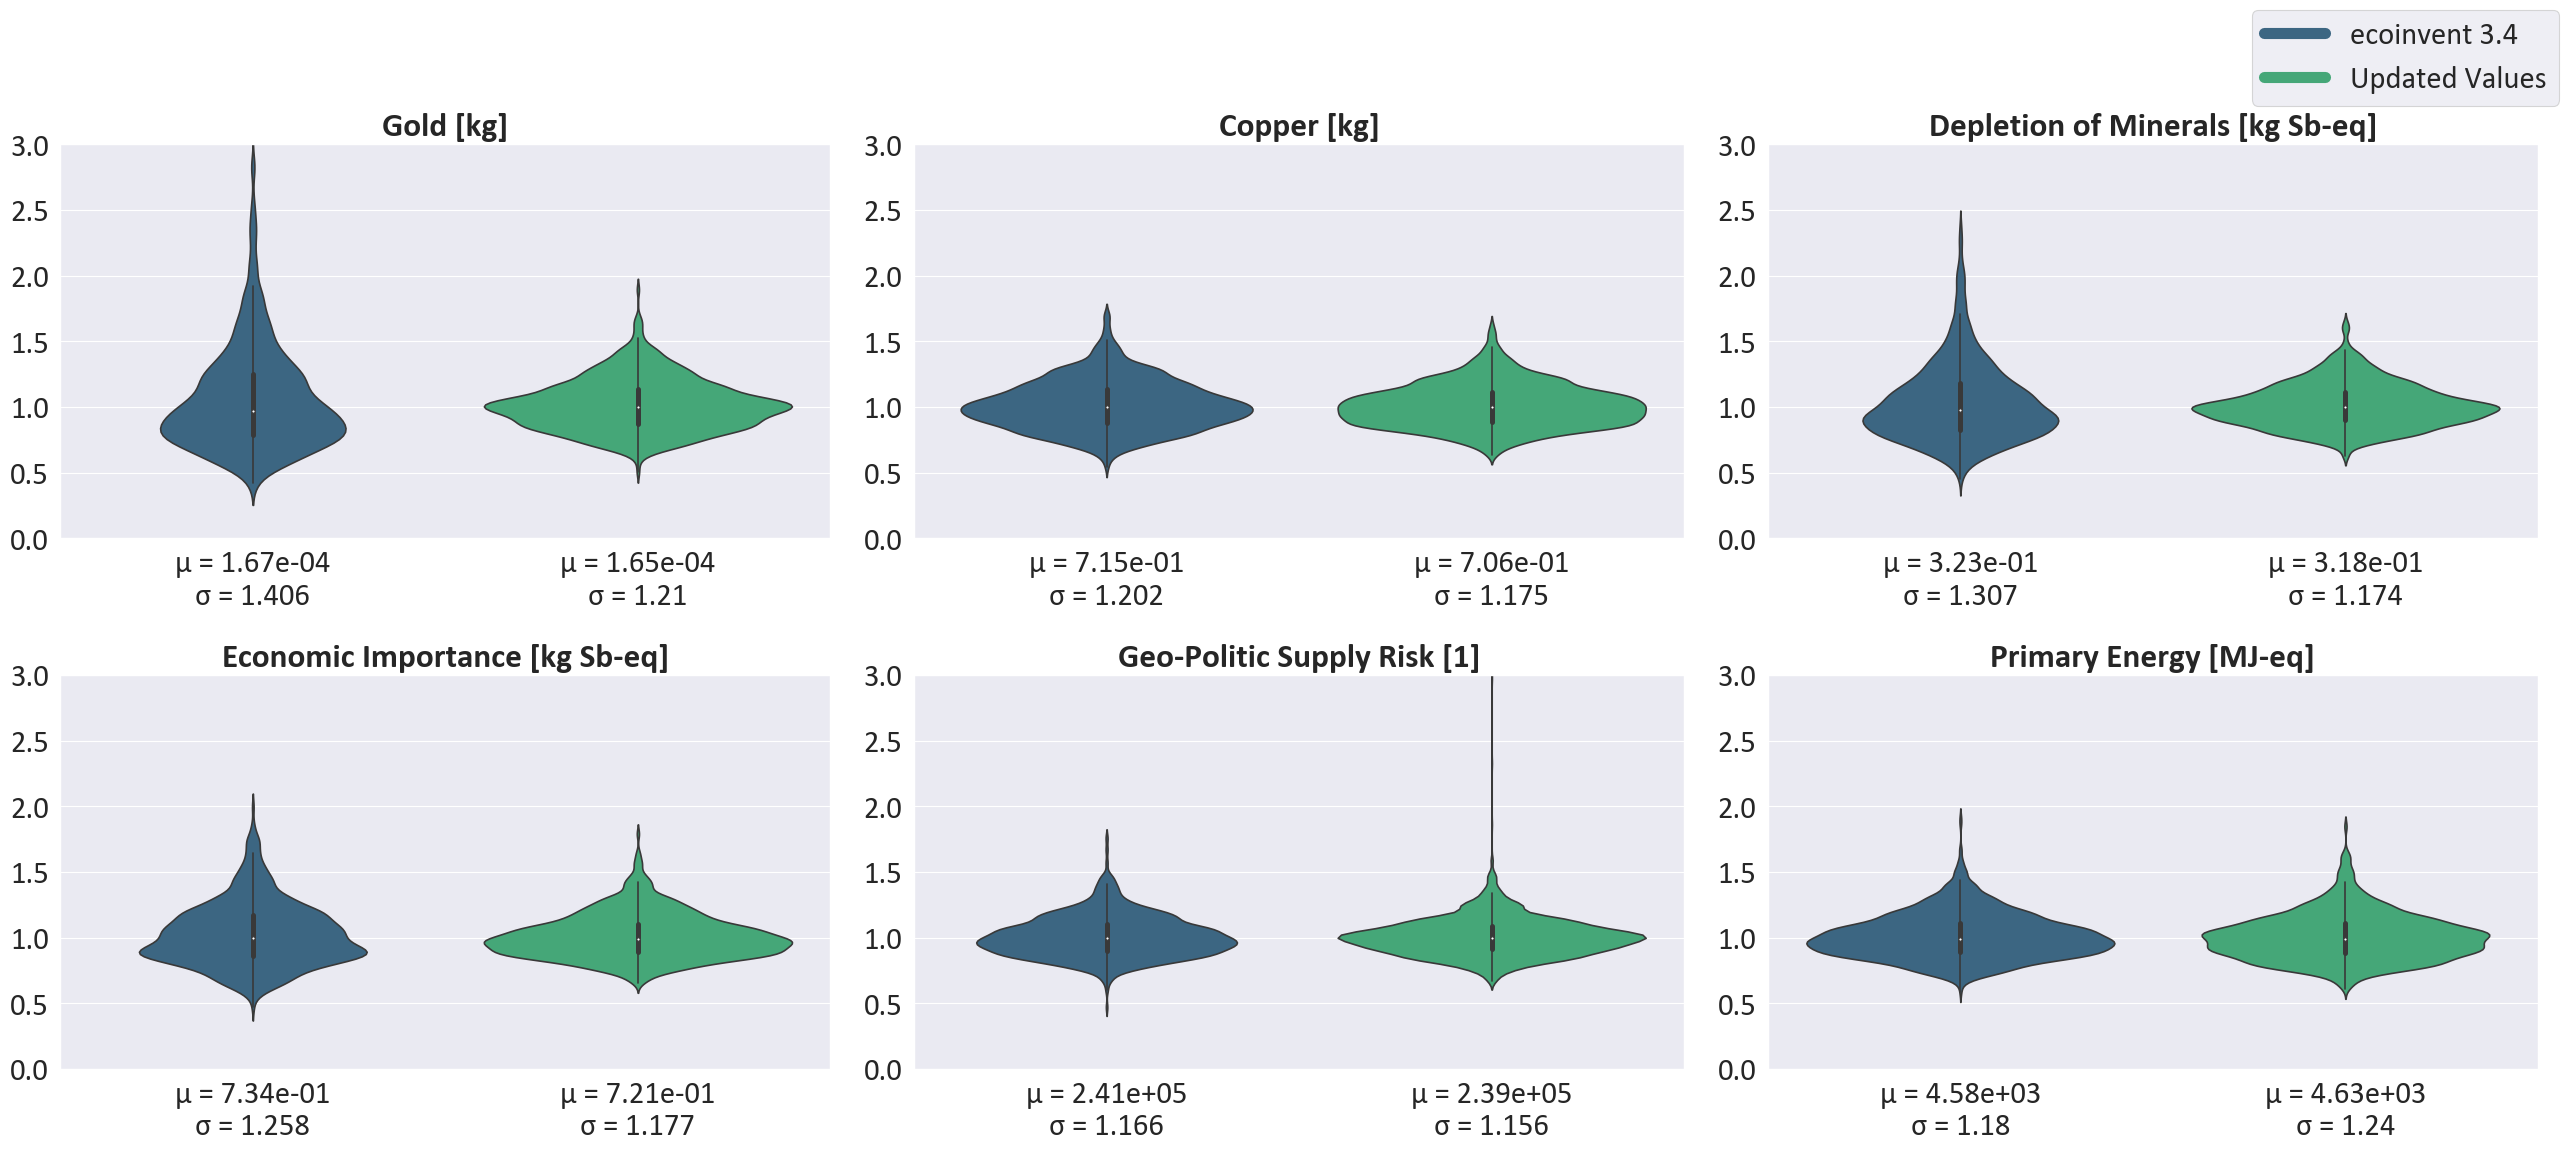

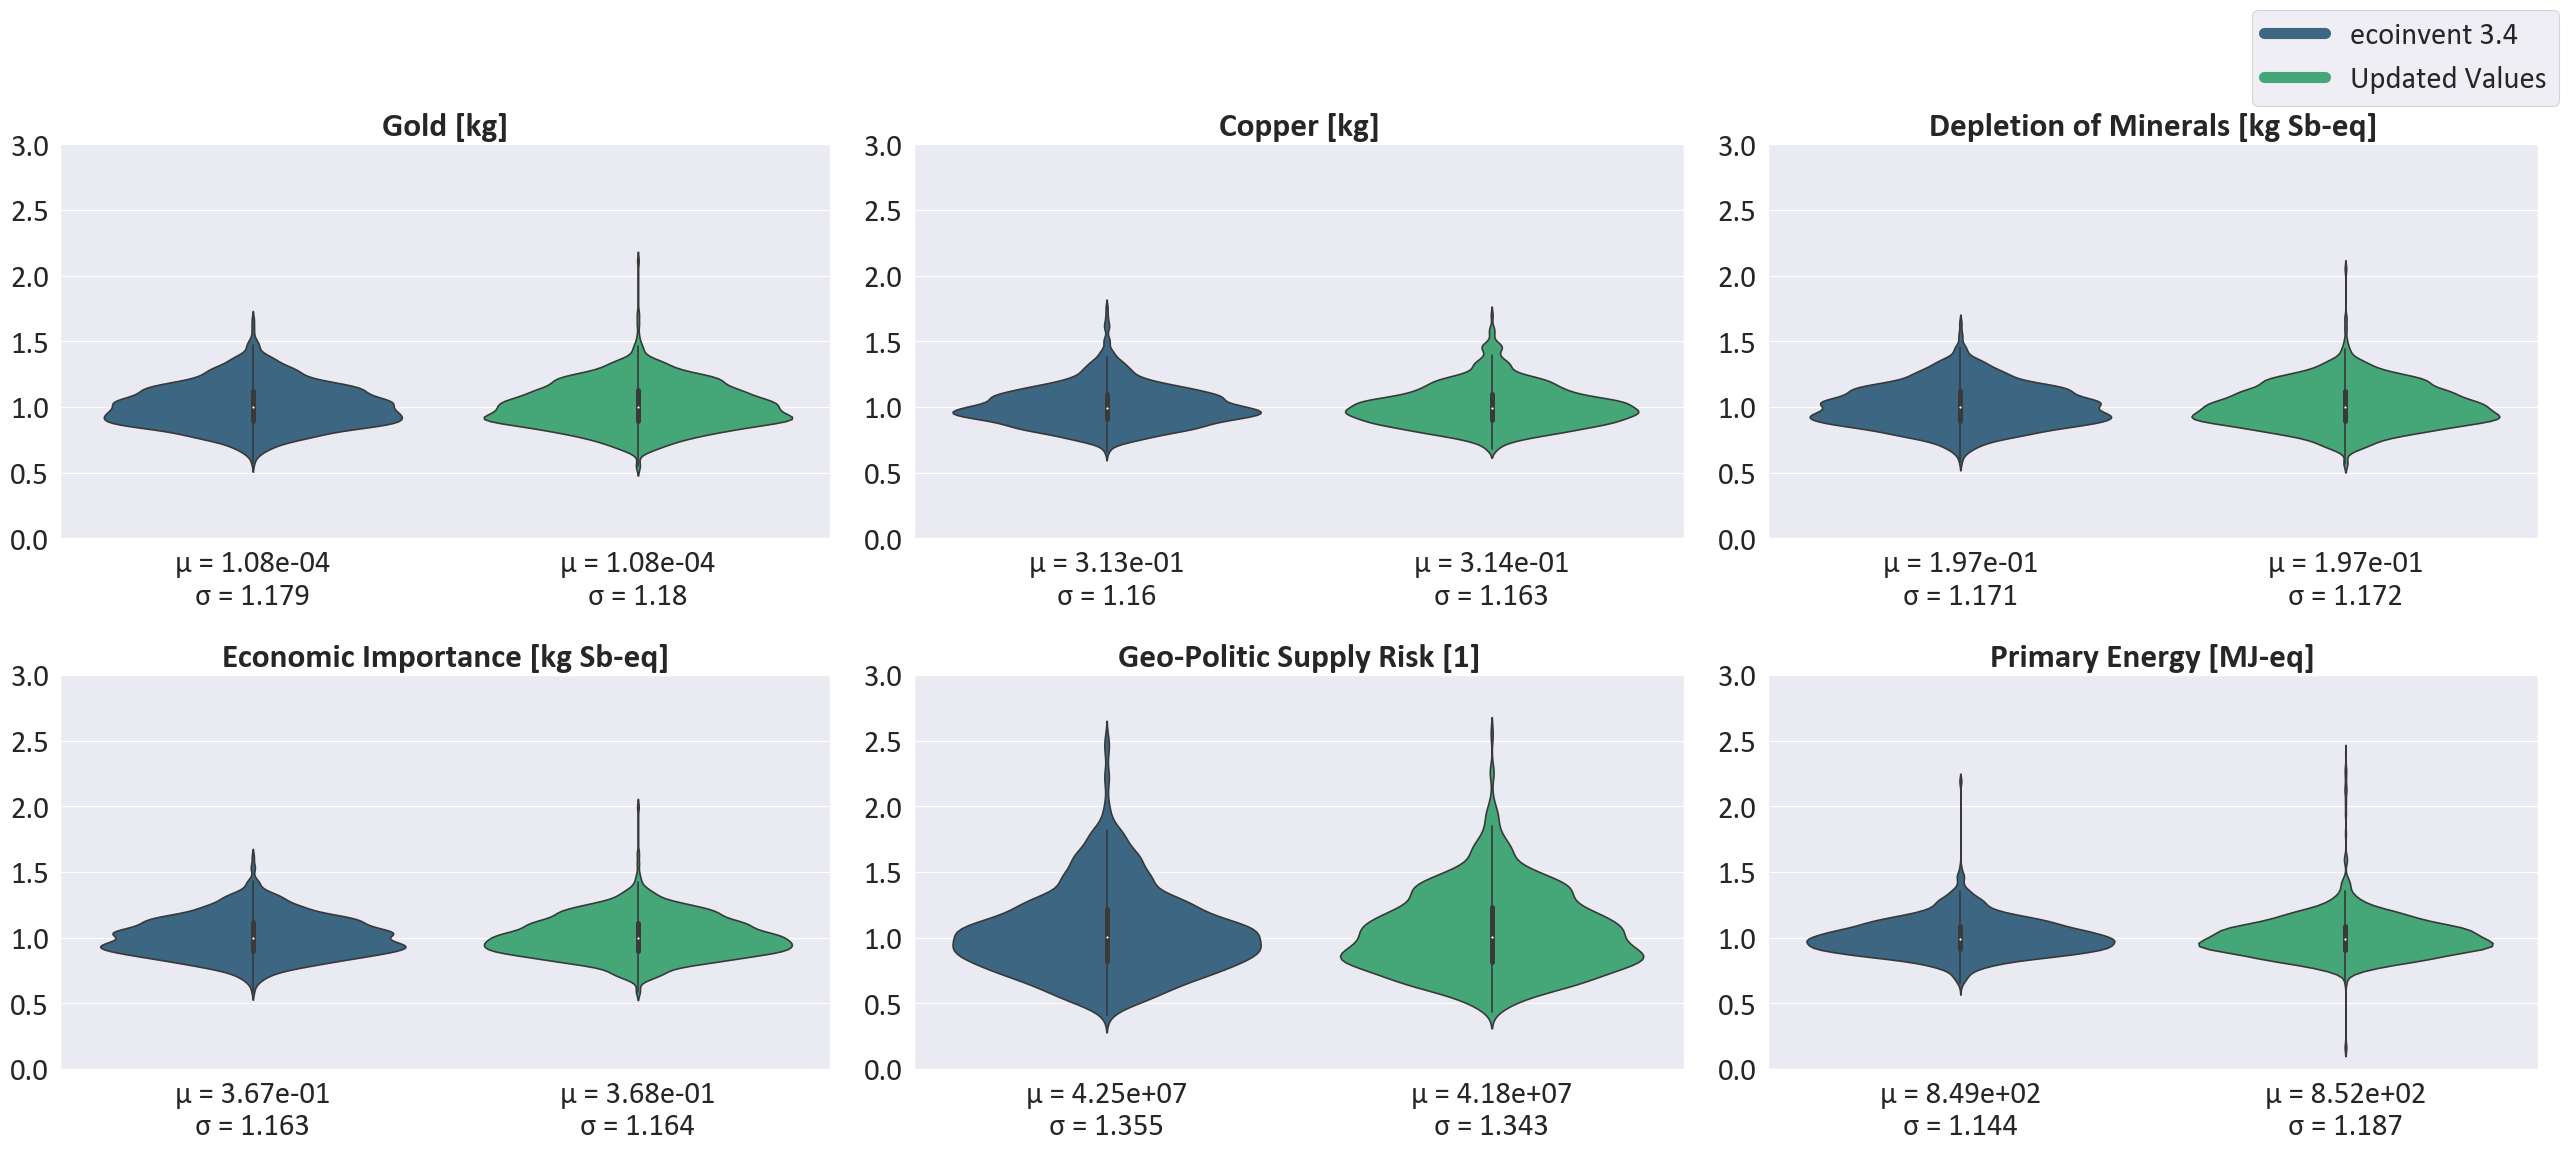

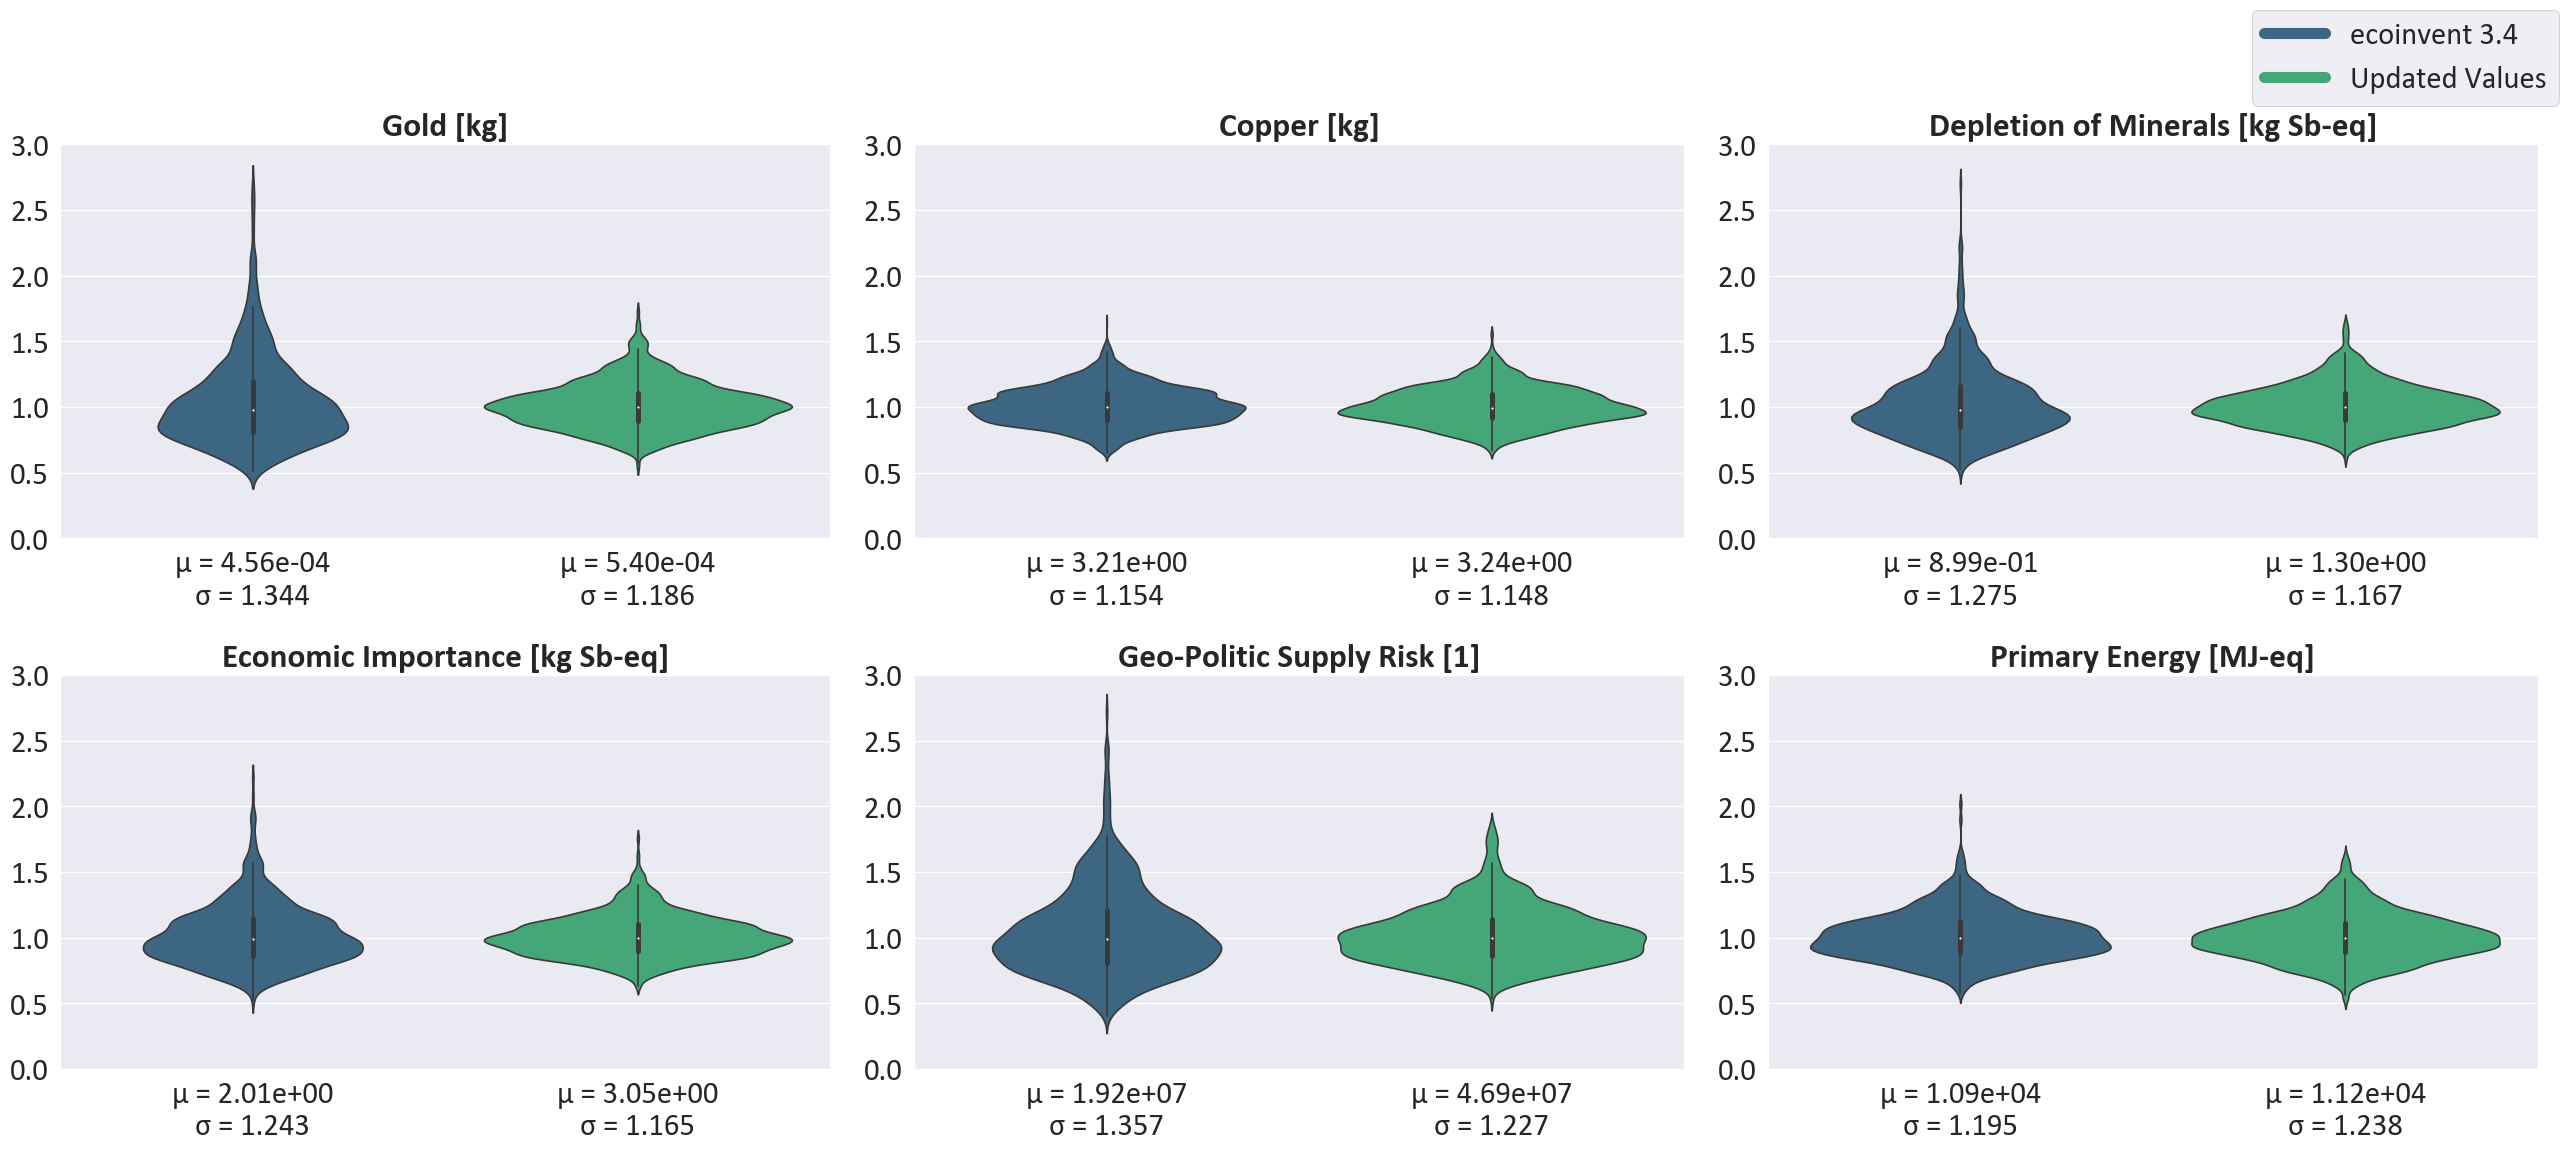

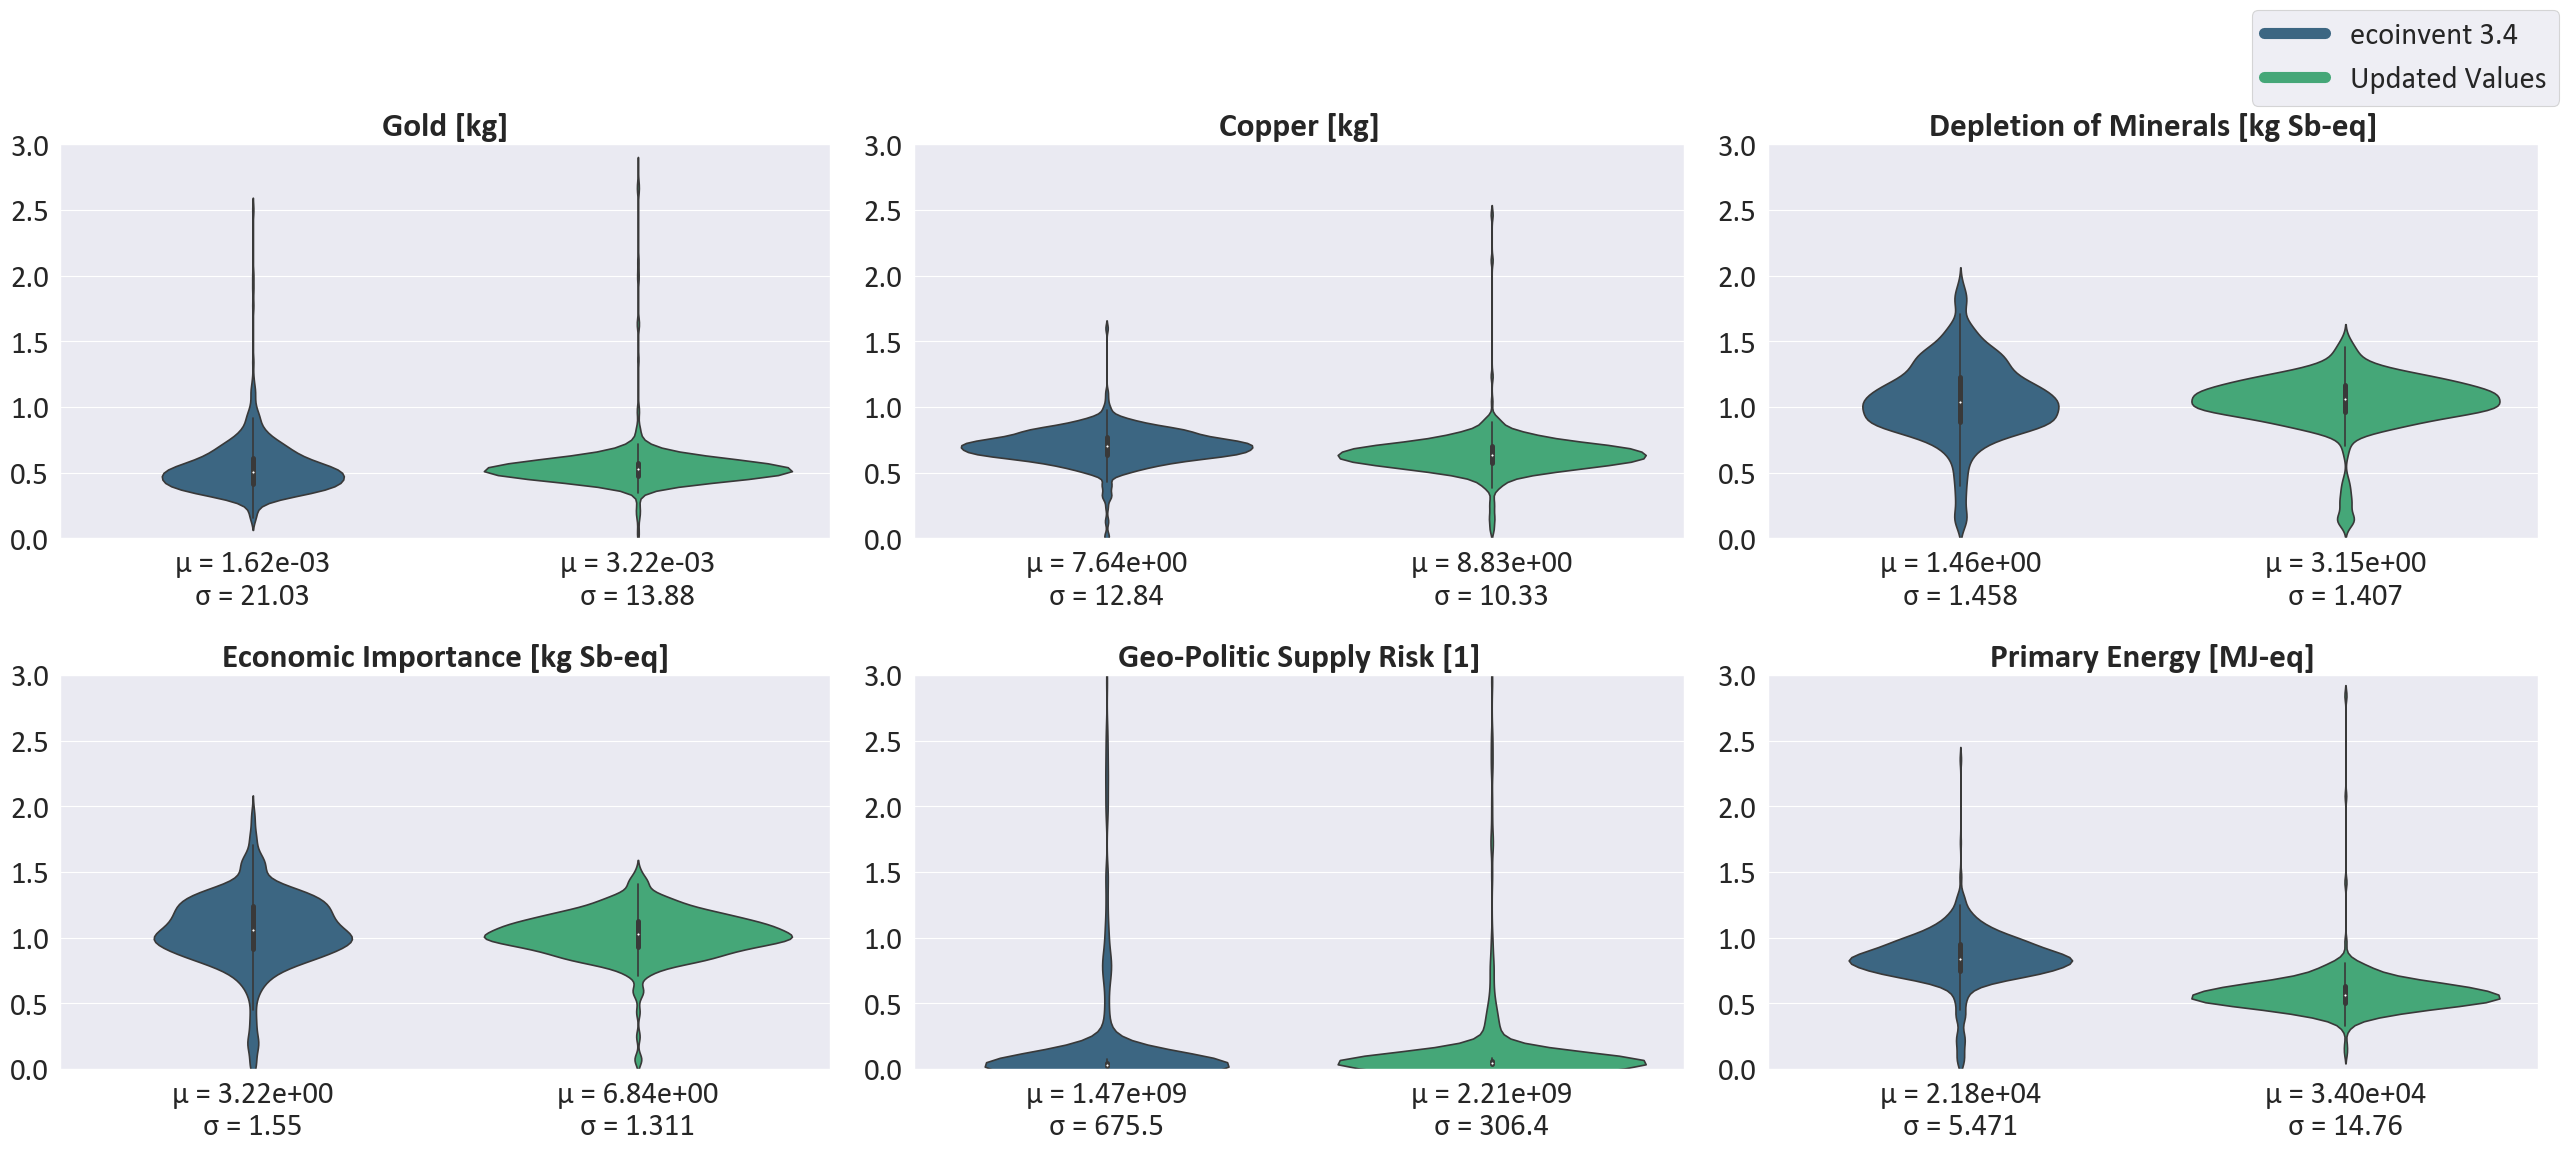

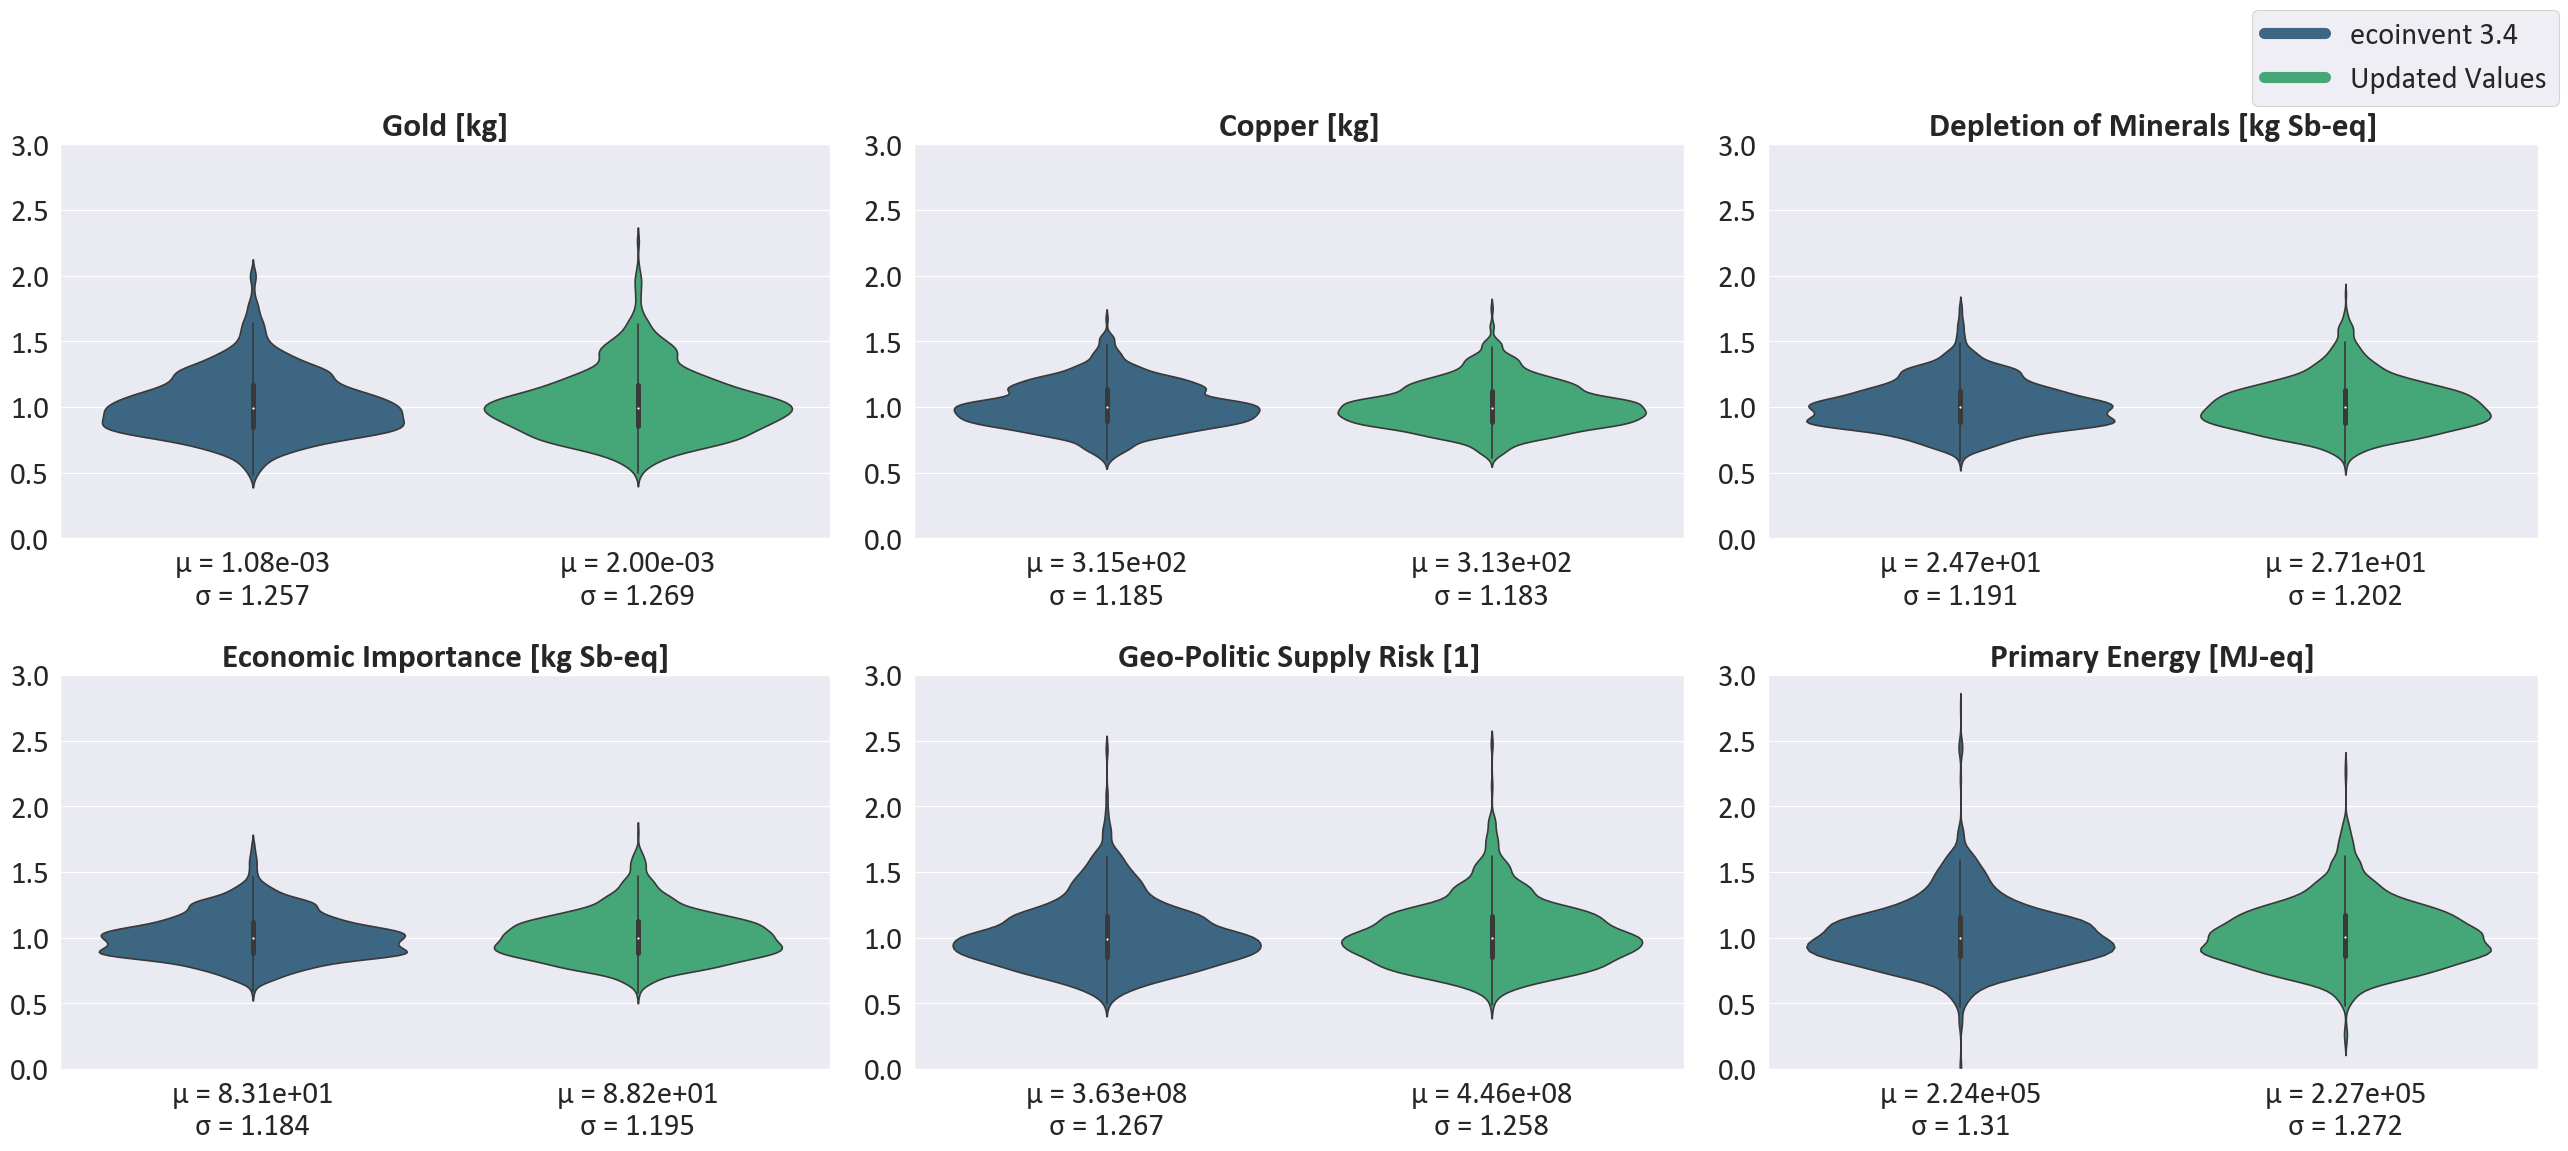

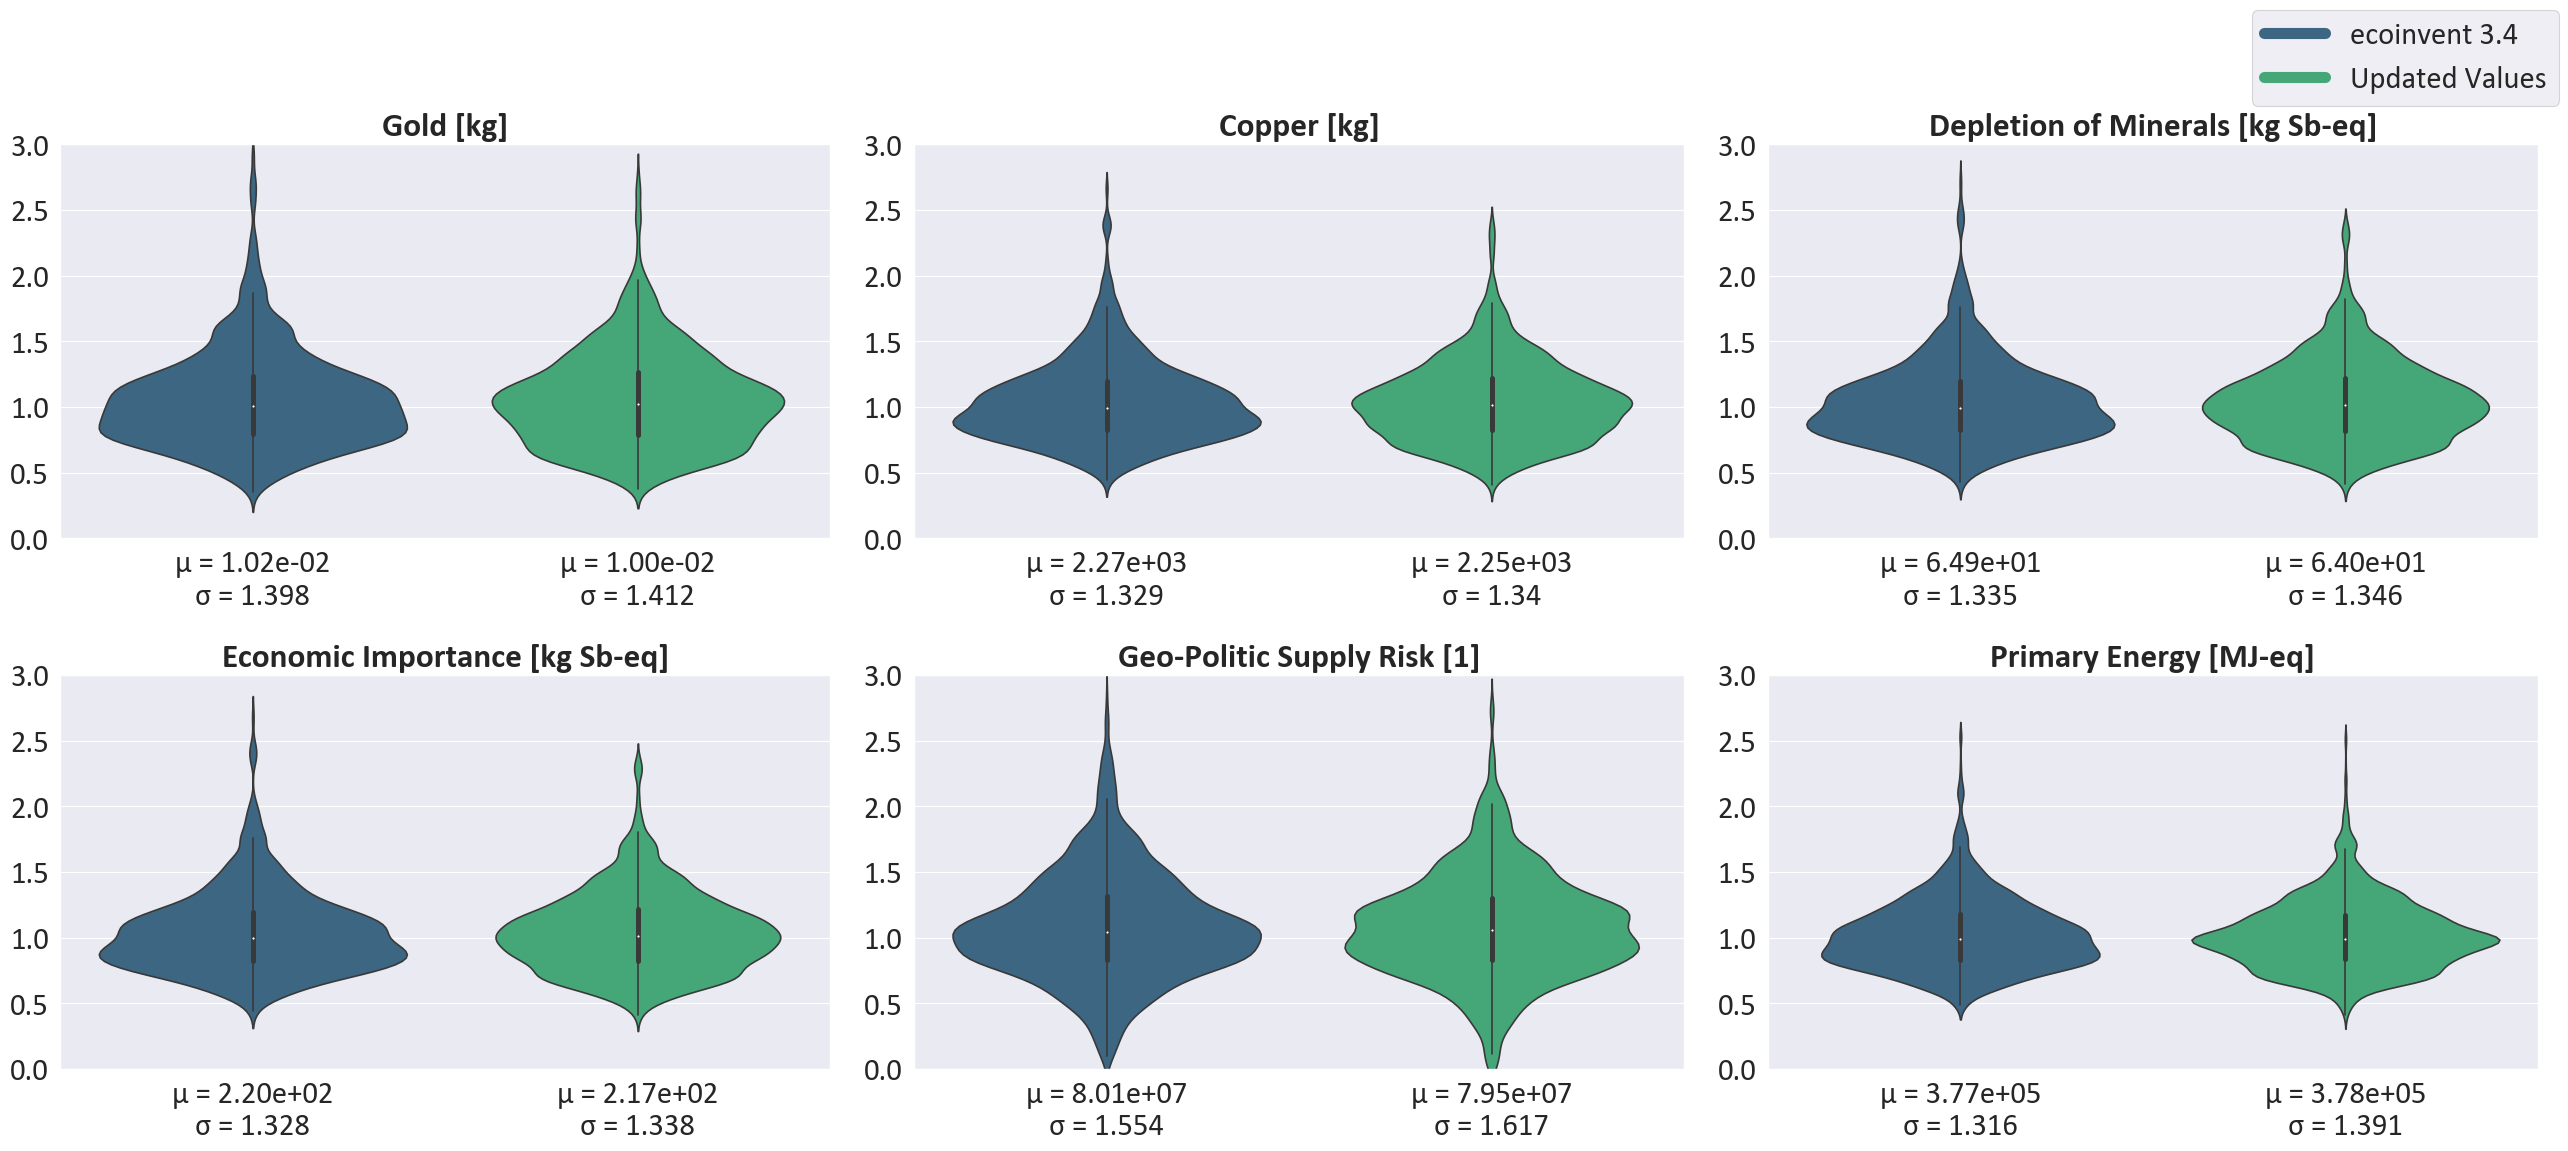

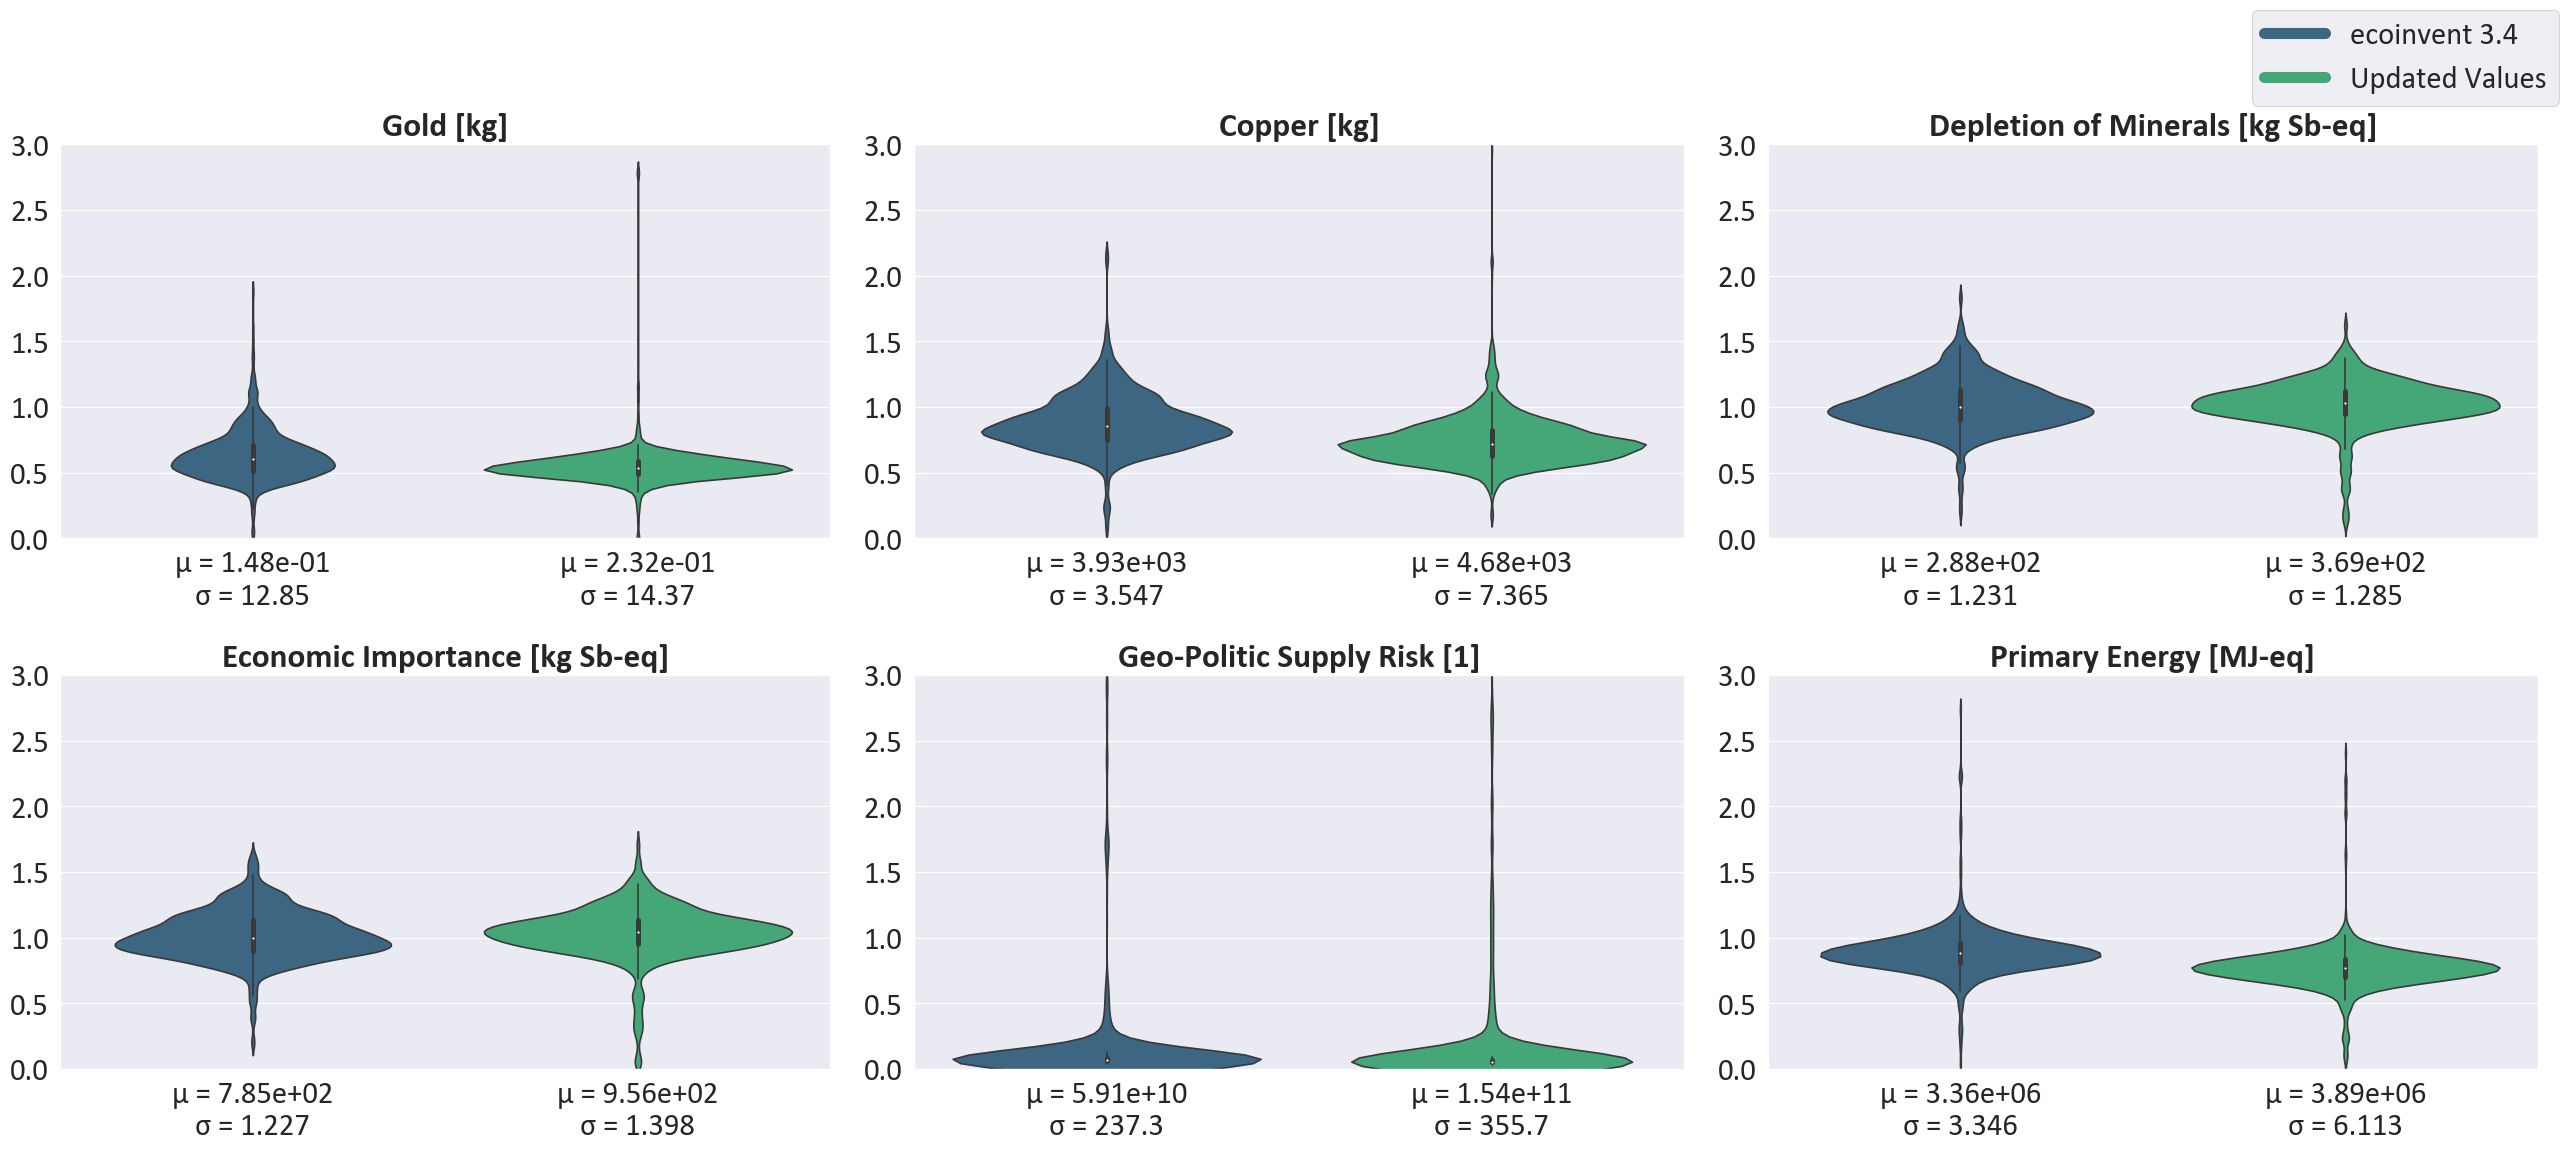

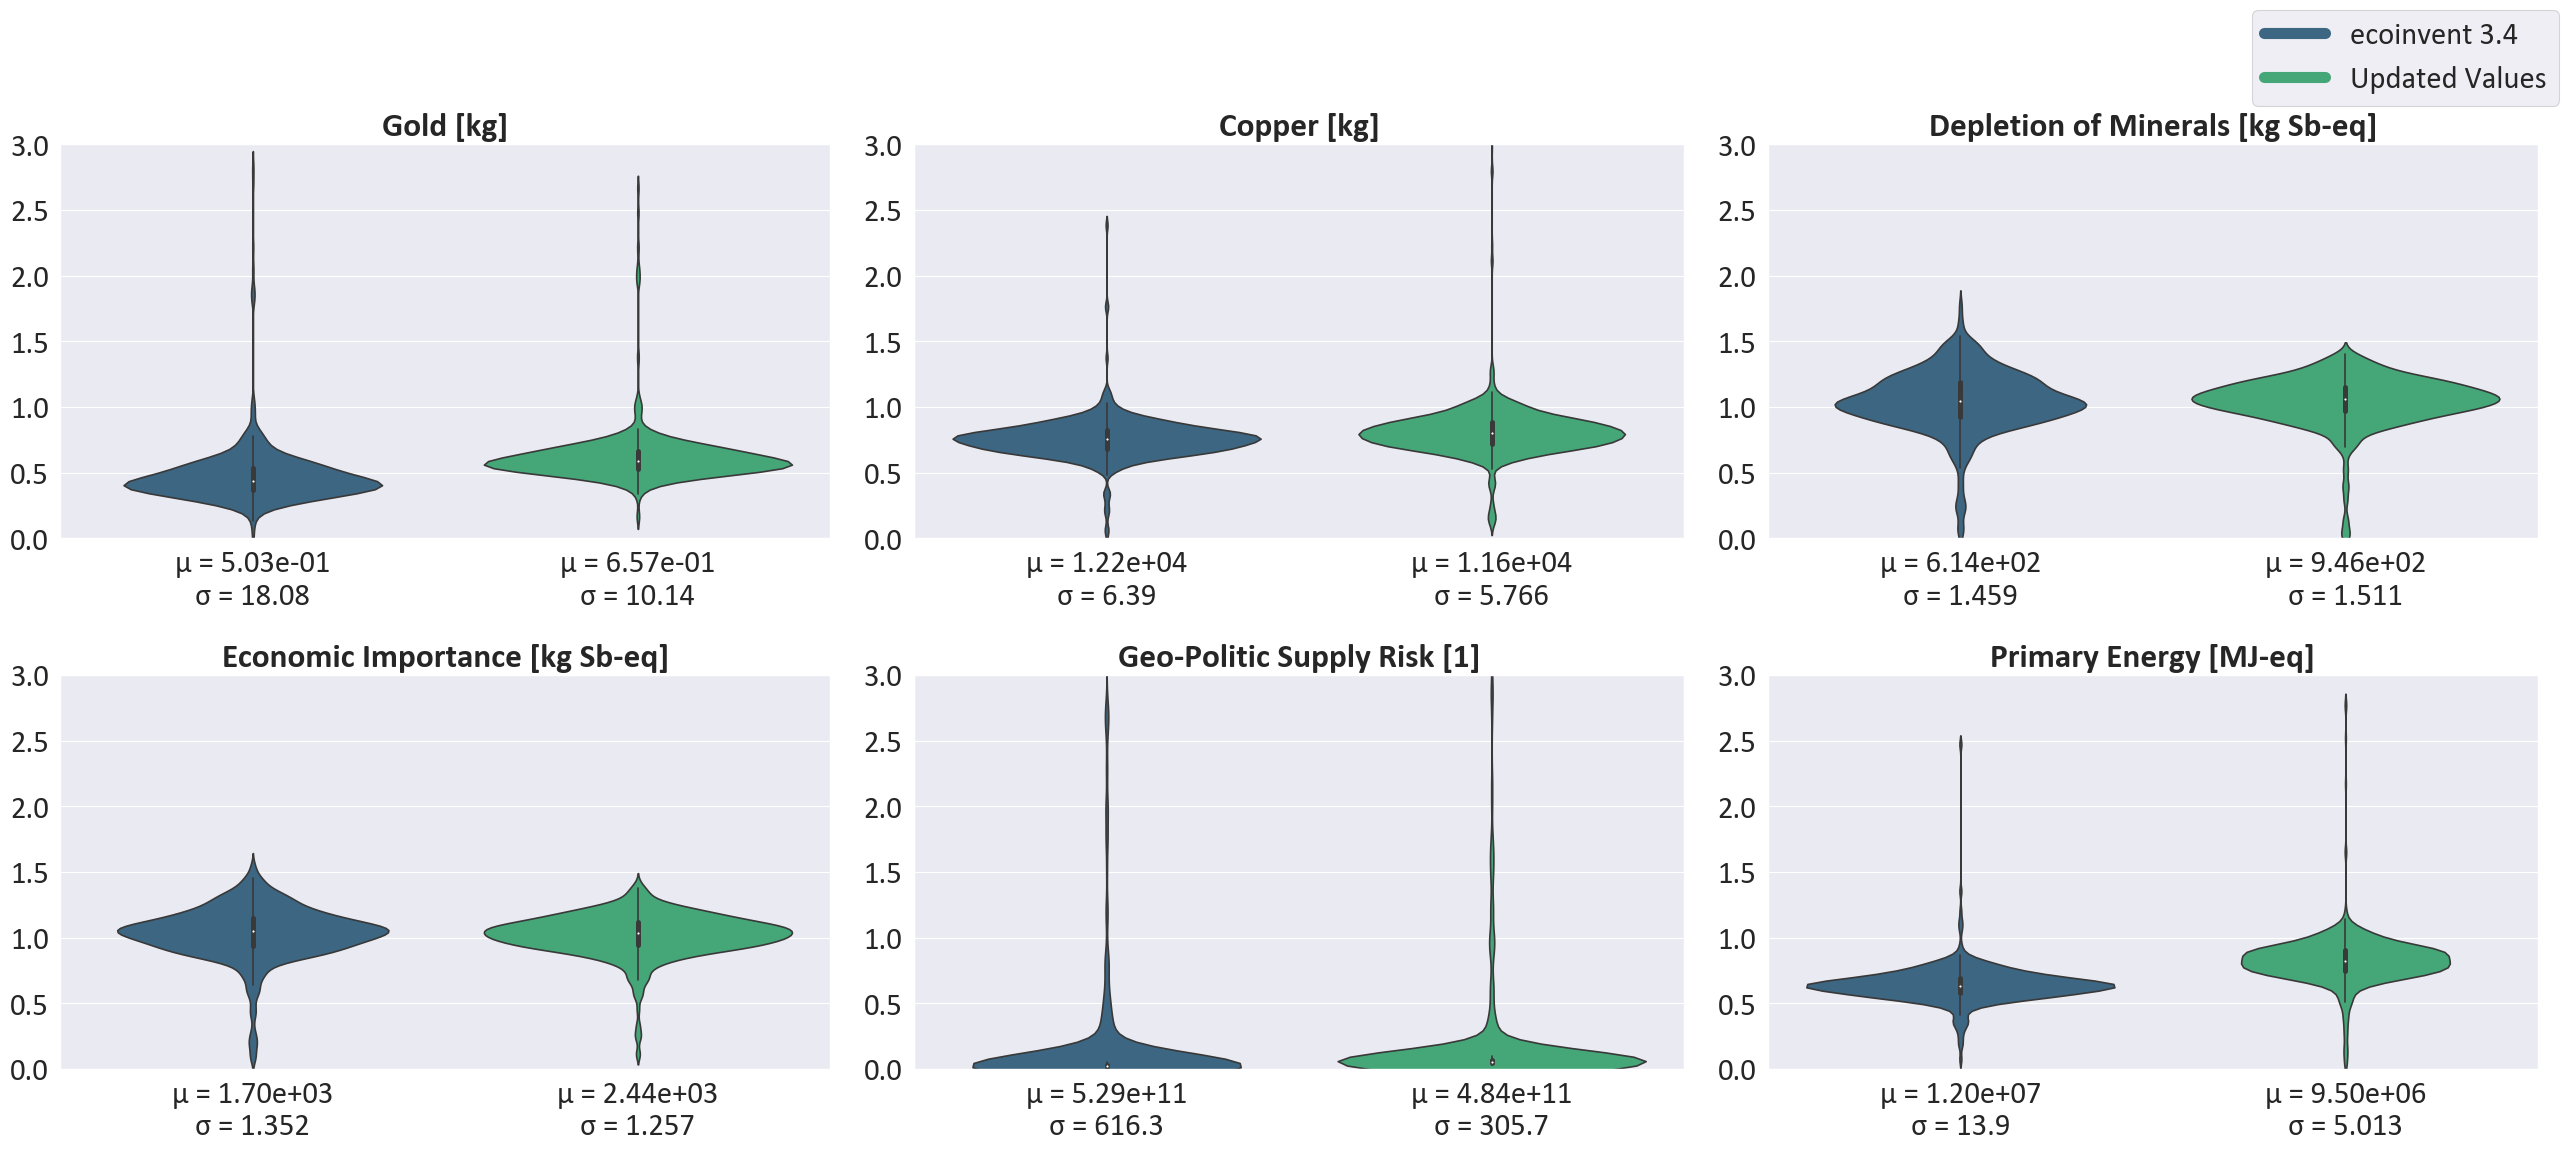

In [ ]:
ps_list = ["3204-CPU, mounted mainboard",
"3208-Mainboard",
"3211-PCB mounted mainboard",
"3219-PCB, for power supply unit",
"4440-Server, 1U, no storage",
"4443-Server, 2U, storage",
"4455-Blade (Ref. Unit)",
"5101-KDO-IT",
"5201-KDO-Climatization",
"5301-KDO-Energy Supply",
"5401-KDO-Infrastructure",
"6001-KDO",
"6003-RZ1"]

for ps in ps_list:
    analyse_montecarlo(ps)
    pass
